# **ESERCIZI LEZIONE 3**

### ***1. CONSUMO DI ALCOL PER PAESE***

In [38]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")

top10 = df.sort_values(by="total_litres_of_pure_alcohol", ascending= False).head(10)

mean_beer = df["beer_servings"].mean()
mean_wine = df["wine_servings"].mean()
mean_spirit = df["spirit_servings"].mean()
print(mean_beer)
print(mean_wine)
print(mean_spirit)

df["alcohol_index"] = (df["beer_servings"]+df["wine_servings"]+df["spirit_servings"])/3

max_alcohol_index = df.loc[df["alcohol_index"].idxmax(), "country"]
print(max_alcohol_index)

df_beer_100 = df[df["beer_servings"]>100]
print(df_beer_100)

106.16062176165804
49.45077720207254
80.99481865284974
Andorra
               country  beer_servings  spirit_servings  wine_servings  \
3              Andorra            245              138            312   
4               Angola            217               57             45   
5    Antigua & Barbuda            102              128             45   
6            Argentina            193               25            221   
8            Australia            261               72            212   
..                 ...            ...              ...            ...   
182     United Kingdom            219              126            195   
184                USA            249              158             84   
185            Uruguay            115               35            220   
188          Venezuela            333              100              3   
189            Vietnam            111                2              1   

     total_litres_of_pure_alcohol  alcohol_index  
3        

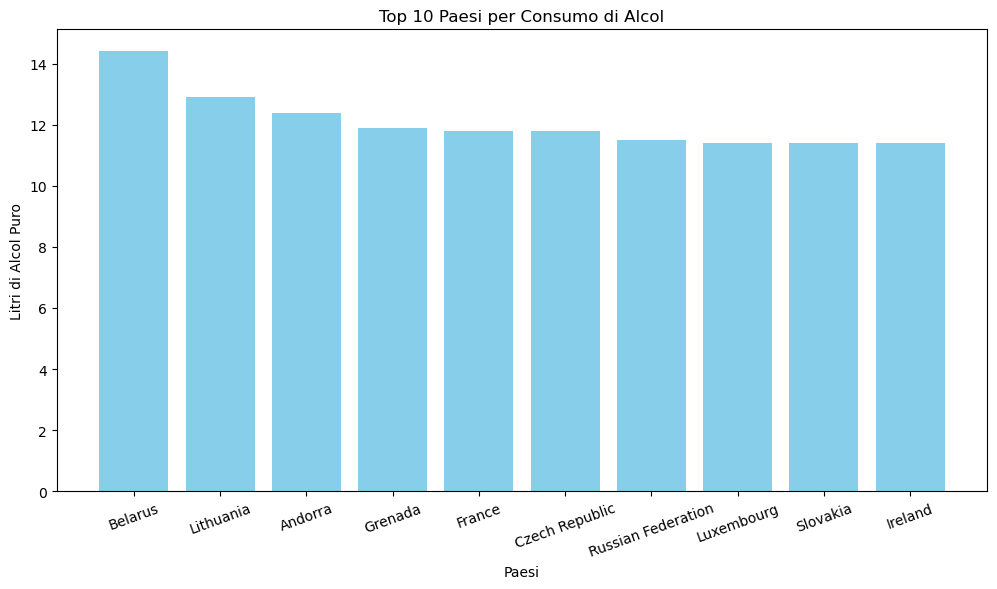

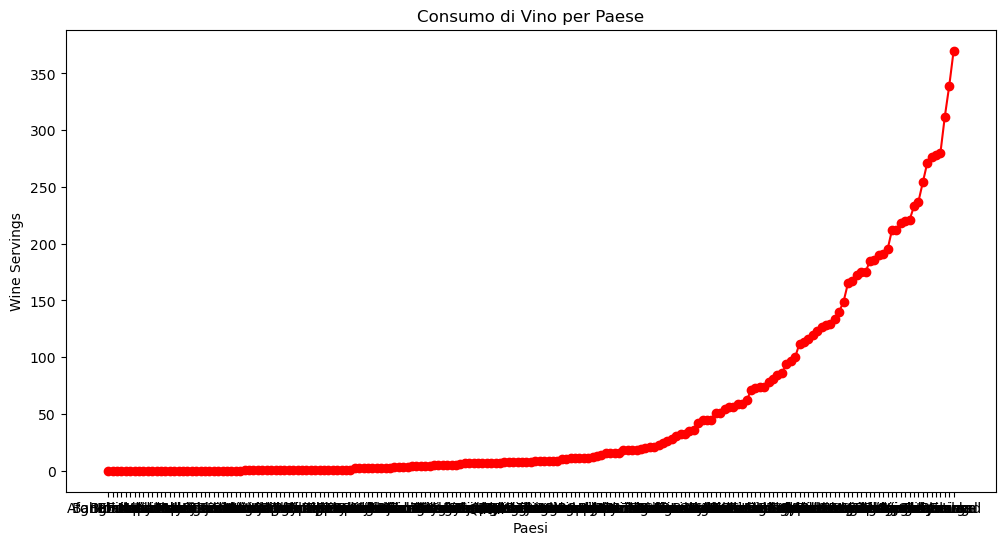

In [39]:
import matplotlib.pyplot as plt

top10_plot = top10[['country', 'total_litres_of_pure_alcohol']]
plt.figure(figsize=(12,6))
plt.bar(top10_plot['country'], top10_plot['total_litres_of_pure_alcohol'], color='skyblue')
plt.xlabel("Paesi")
plt.ylabel("Litri di Alcol Puro")
plt.title("Top 10 Paesi per Consumo di Alcol")
plt.xticks(rotation=20)
plt.show()

df_sorted_wine = df.sort_values(by='wine_servings')
plt.figure(figsize=(12,6))
plt.plot(df_sorted_wine['country'], df_sorted_wine['wine_servings'], marker='o', linestyle='-', color='red')
plt.xlabel("Paesi")
plt.ylabel("Wine Servings")
plt.title("Consumo di Vino per Paese")
plt.show()


### ***2. ANALISI OFFERTE DI LAVORO***

job_country
Afghanistan              NaN
Albania         79472.500000
Algeria         44550.000000
Angola                   NaN
Argentina      105212.343750
                   ...      
Venezuela                NaN
Vietnam         90927.236364
Yemen                    NaN
Zambia          90670.000000
Zimbabwe        67056.666667
Name: salary_year_avg, Length: 160, dtype: float64
job_country
United States     206292
India              51088
United Kingdom     40375
France             39922
Germany            27694
                   ...  
Guinea                 4
Lesotho                3
Mauritania             3
Bhutan                 3
Maldives               2
Name: count, Length: 160, dtype: int64
             Min Salary  Max Salary
job_country                        
Afghanistan         NaN         NaN
Albania         43200.0    157500.0
Algeria         44100.0     45000.0
Angola              NaN         NaN
Argentina       45000.0    222000.0
...                 ...         ...
Vene

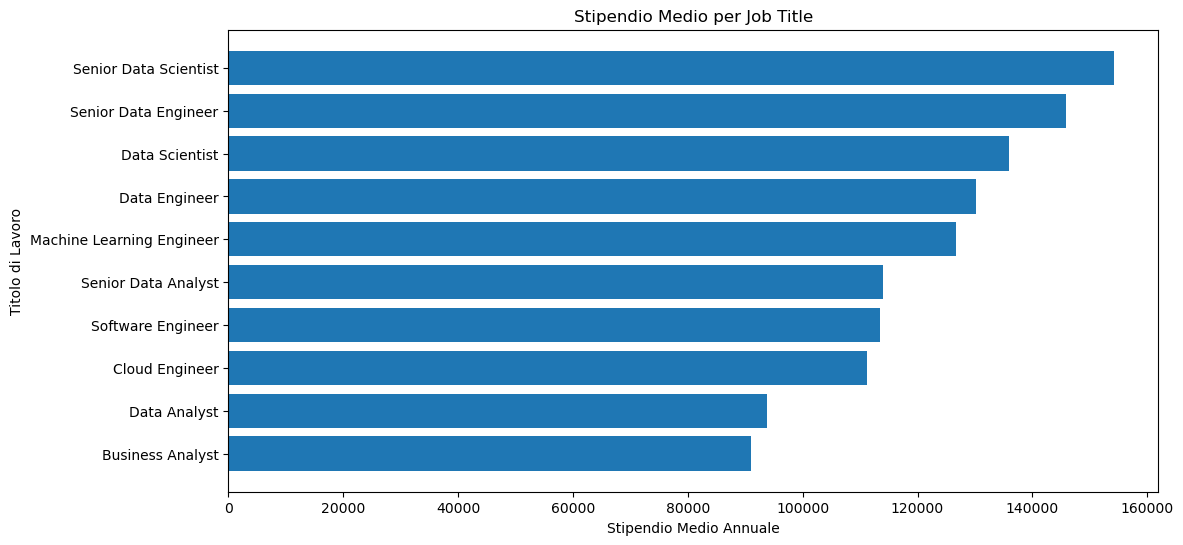

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

salary_avg = df.groupby('job_country')['salary_year_avg'].mean()
print(salary_avg)

job_count = df['job_country'].value_counts()
print(job_count)

salary_min = df.groupby('job_country')['salary_year_avg'].min()
salary_max = df.groupby('job_country')['salary_year_avg'].max()
salary_range = pd.DataFrame({'Min Salary': salary_min, 'Max Salary': salary_max})
print(salary_range)

salary_by_title = df.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(salary_by_title.index, salary_by_title.values)
plt.xlabel("Stipendio Medio Annuale")
plt.ylabel("Titolo di Lavoro")
plt.title("Stipendio Medio per Job Title")
plt.gca().invert_yaxis()
plt.show()
